In [1]:
import tensorflow as tf
from tensorflow import keras

# Getting DataSet:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
train_labels.min(), train_labels.max()

(0, 9)

In [4]:
# Creating model_1:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), 
    tf.keras.layers.Dense(128, activation = 'relu'), 
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# Compiling model:
model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ['accuracy'])

# Train model:
history_1 = model_1.fit(train_images, train_labels, 
                        epochs = 5, 
                        validation_data = (test_images, test_labels))

# Evaluate model:
test_loss, test_acc  = model_1.evaluate(test_images, test_labels)
print('Test Accuracy:', test_acc)

# Make predictions:
predictions_model_1 = model_1.predict(test_images)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.5930 - accuracy: 0.8571 - val_loss: 0.5097 - val_accuracy: 0.8731
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3851 - accuracy: 0.9033 - val_loss: 0.3820 - val_accuracy: 0.9175
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3036 - accuracy: 0.9217 - val_loss: 0.3113 - val_accuracy: 0.9264
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2605 - accuracy: 0.9329 - val_loss: 0.3234 - val_accuracy: 0.9178
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3829 - accuracy: 0.9180
Test Accuracy: 0.9179999828338623
313/313 [==============================] - 0s 1ms/step


In [5]:
# Setting the class names for each of the axis available 0-10 (numbers between 1 - 10)

class_names = [str(i) for i in range(10)]

class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [6]:
class_names = [str(i) for i in range(10)]

first_image = train_images[0]
first_label = train_labels[0]

class_name = class_names[first_label]

class_name



'5'

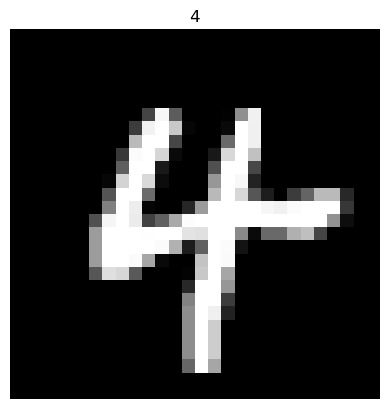

In [7]:
import matplotlib.pyplot as plt
import random

i = random.randint(0, len(train_images) -1 )

plt.imshow(train_images[i], cmap = 'gray')
plt.title(class_names[train_labels[i]])
plt.axis('off')
plt.show()

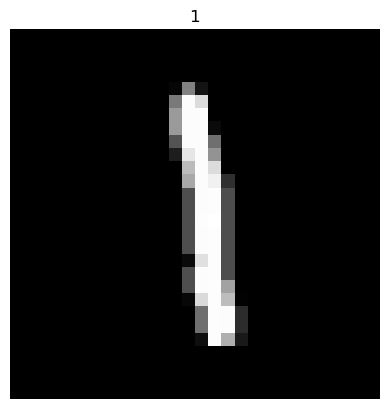

In [8]:
### Plotting predictions with true labels also there: 

import matplotlib.pyplot as plt
import random

i = random.randint(0, len(train_images) -1 )

plt.imshow(train_images[i], cmap = 'gray')
plt.title(class_names[train_labels[i]])
plt.axis('off')
plt.show()

In [9]:
train_images_norm = tf.keras.utils.normalize(train_images, axis = 1)

test_images_norm = tf.keras.utils.normalize(test_images, axis = 1)

In [10]:
train_images_norm.shape

(60000, 28, 28)

In [11]:
train_labels.min(), train_labels.max()

(0, 9)

In [12]:
from ast import Lambda
# Building model with mormalized data AND setting a Learning Rate Callback:

# Setting random seed:
tf.random.set_seed(42)

# Create model:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu'), 
    tf.keras.layers.Dense(10, activation = 'softmax') # 10 because there are 10 outputs classes available 
])

# Compile model:
model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
                metrics = ['accuracy'])

# Creating a LEARNING RATE CALLBACK:
lr_scheduler1 = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit model:
history_2 = model_2.fit(train_images_norm, train_labels, 
                        epochs = 30, 
                        validation_data = (test_images_norm, test_labels),
                        callbacks = [lr_scheduler1])

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3094 - accuracy: 0.9139 - val_loss: 0.1816 - val_accuracy: 0.9451 - lr: 0.0010
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1422 - accuracy: 0.9582 - val_loss: 0.1351 - val_accuracy: 0.9596 - lr: 0.0011
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0976 - accuracy: 0.9704 - val_loss: 0.0963 - val_accuracy: 0.9704 - lr: 0.0013
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0742 - accuracy: 0.9775 - val_loss: 0.0933 - val_accuracy: 0.9710 - lr: 0.0014
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0578 - accuracy: 0.9826 - val_loss: 0.1046 - val_accuracy: 0.9686 - lr: 0.0016
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0476 - accuracy: 0.9851 - val_loss: 0.0981 - val_accuracy: 0.9709 - lr: 0.0018
Epoch 7/30
1875/1875 [==============================] - 4s

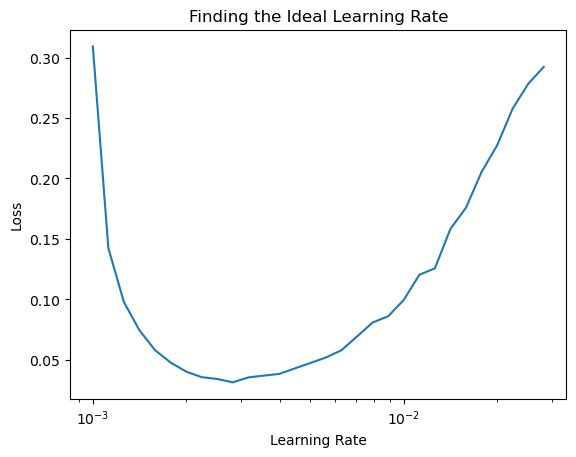

In [13]:
# PLotting rate decay curve:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Assuming history_2.history['loss] has 40 elements:
loss_values = history_2.history['loss']

lrs = 1e-3 * (10**(tf.range(30)/20))
plt.semilogx(lrs, loss_values) # Plotting all elements of lrs and loss_values

# Making the plot pretty:
plt.title('Finding the Ideal Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')

plt.show()

In [36]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

import tensorflow as tf
from datetime import datetime

# Clear any logs from previous runs
# rm -rf logs

# Define the log directory path
log_dir = './logs'

# Create the TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [37]:
# Creating a model with a leanring rate in between 10^-3 (0.001) and 10^-2 (0.01)

# Set random seed:
tf.random.set_seed(42)

# Create model:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# Compiling model:
model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005), 
                metrics = ['accuracy'])

# Fit model:
history_3 = model_3.fit(train_images_norm, train_labels, 
                        epochs = 30, 
                        validation_data = (test_images_norm, test_labels), 
                        verbose = 0, 
                        callbacks = [tensorboard_callback])


In [38]:
model_3.evaluate(test_images_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2881 - accuracy: 0.9746


[0.2881196141242981, 0.9746000170707703]

<AxesSubplot:title={'center':'Normalized Data & lr = 0.005'}>

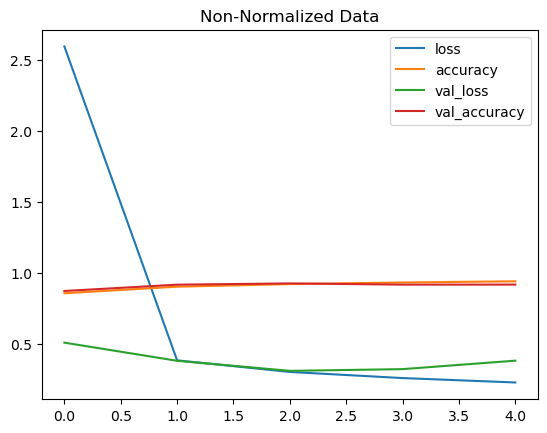

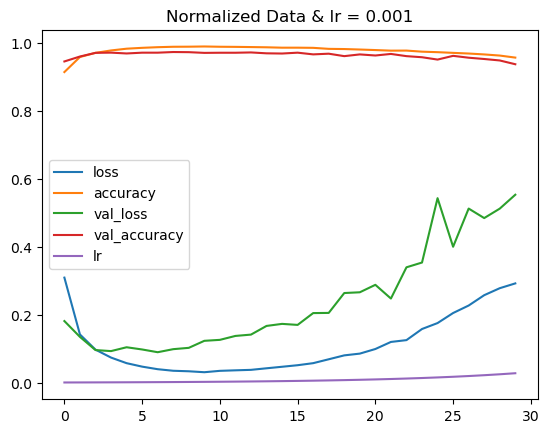

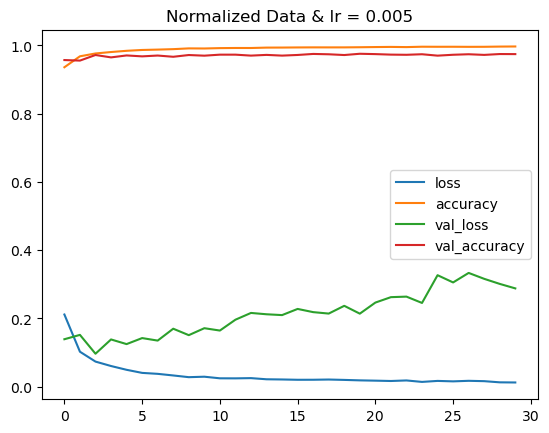

In [39]:
import pandas as pd

# Plot non-normalized data:
pd.DataFrame(history_1.history).plot(title = 'Non-Normalized Data')

# Plot normalized data, with default lr (0.001):
pd.DataFrame(history_2.history).plot(title = 'Normalized Data & lr = 0.001')

# Plot normalized data, with lr = 0.005
pd.DataFrame(history_3.history).plot(title = 'Normalized Data & lr = 0.005')

In [40]:
# Creating a Confusion Matrix function to use it later:

import itertools
from sklearn.metrics import confusion_matrix

# Creating the function. NOTE: the name must be different from sklearn's plot_confusion_matrix
def plotting_confusion_matrix(y_true, y_pred, classes = None, figsize = (10, 10), text_size = 15):

  # Creating Confusion Matrix:
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis] # Normalizing it
  n_classes = cm.shape[0] # Finding out the number of classes we're dealing with

  # Plotting the CM and making it pretty:
  fig, ax = plt.subplots(figsize = figsize)
  cax = ax.matshow(cm, cmap = plt.cm.Blues) # Making darker colors represent better results
  fig.colorbar(cax)

  # Is there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes:
  ax.set(title = 'Confusion Matrix', 
          xlabel = 'Predicted label', 
          ylabel = 'True label',
          xticks = np.arange(n_classes), 
          yticks = np.arange(n_classes), 
          xticklabels = labels, 
          yticklabels = labels)
  
  # Making the axis labels appear on the bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Setting the threshhold for different colors:
  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)", 
             horizontalalignment = 'center', 
             color = 'white' if cm[i, j] > threshold else "black", 
             size = text_size)

In [41]:
# Defining y_probs
y_probs = model_3.predict(test_images_norm)

313/313 [==============================] - 0s 1ms/step


In [42]:
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(7, '7')

In [43]:
# Converting all prediction variables into integers:
y_preds = y_probs.argmax(axis = 1)

y_preds[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [44]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = test_labels, 
                 y_pred = y_preds)

array([[ 969,    1,    1,    1,    0,    0,    4,    2,    2,    0],
       [   0, 1123,    3,    2,    0,    0,    3,    1,    3,    0],
       [   3,    0, 1007,    5,    1,    0,    3,    8,    5,    0],
       [   0,    0,    5,  986,    0,    8,    0,    3,    4,    4],
       [   2,    0,    3,    0,  962,    0,    1,    5,    3,    6],
       [   4,    0,    1,   13,    0,  861,    2,    4,    4,    3],
       [   3,    3,    2,    0,    5,    9,  933,    0,    3,    0],
       [   2,    4,    5,    4,    0,    0,    0, 1003,    3,    7],
       [   4,    1,    6,    5,    7,    7,    4,    4,  933,    3],
       [   1,    4,    0,    7,   13,    5,    0,    5,    5,  969]],
      dtype=int64)

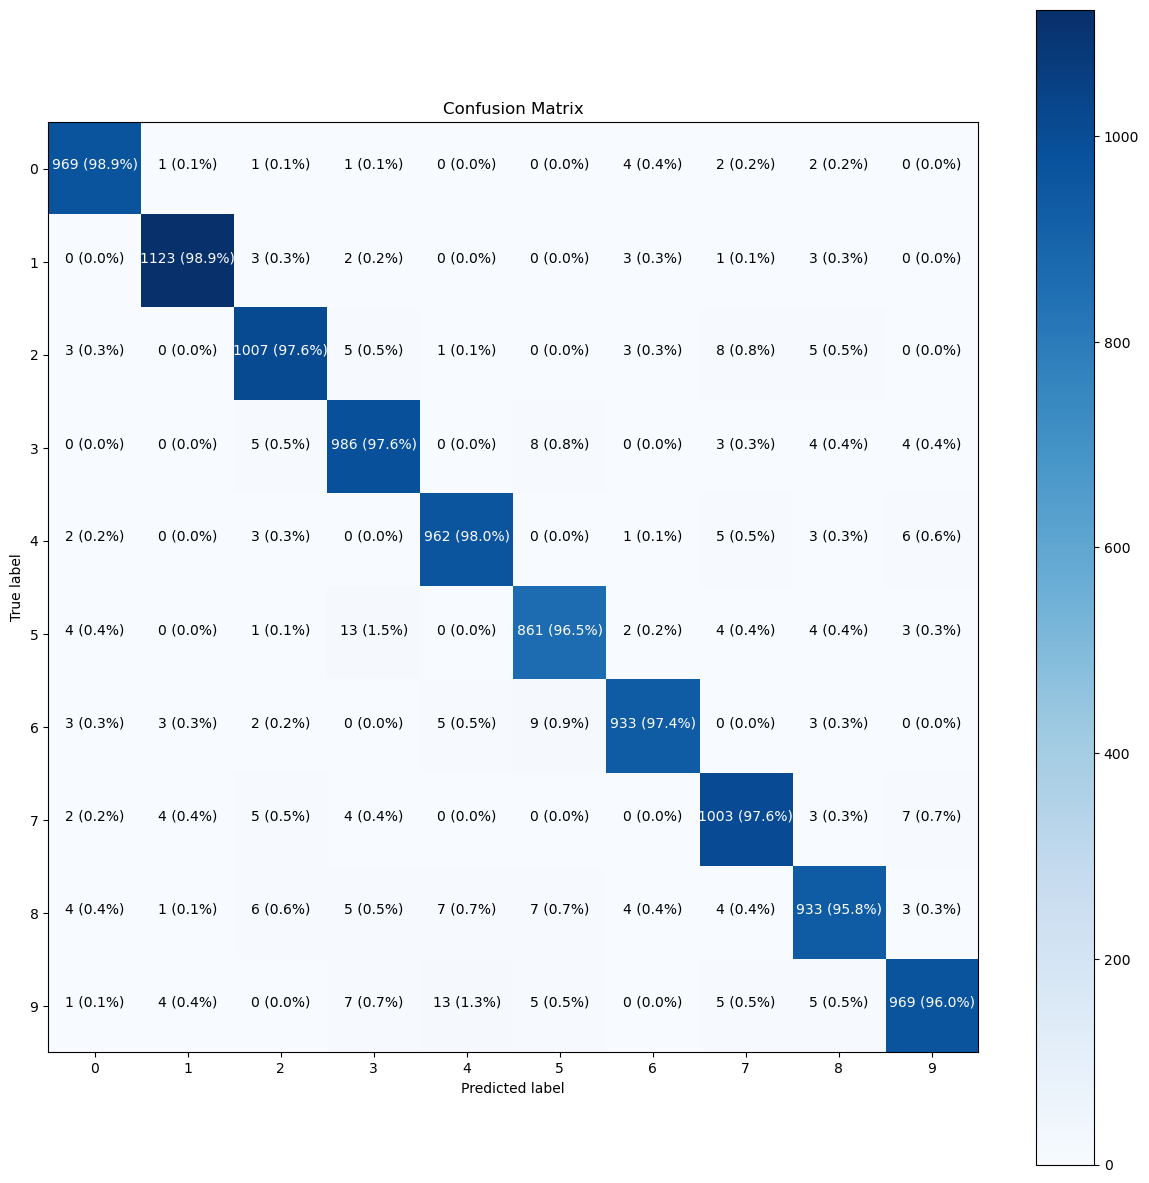

In [45]:
import numpy as np

# Making Confusion Matrix PRETTIER!!! (Using the function defined before):
plotting_confusion_matrix(y_true = test_labels, 
                          y_pred = y_preds, 
                          classes = class_names, 
                          figsize = (15, 15), 
                          text_size = 10)


In [46]:
# Showing/plotting random pictures with their labels in blue/red based on whether they are predicted correctly or not:

import random
# Creating function for it:
def plotting_random_image(model, images, true_labels, classes):

  # Setting a random integer:
  i = random.randint(0, len(images)) # i wil be a random integer number between 0 and the length of images
  
  # Creating predictions and targets:
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # 28, 28 because it's the shape of the images, AND 1 because we are only predicting one image!
  pred_label = classes[pred_probs.argmax()] # Getting the one with the highest probability, so we make sure it's the right one
  true_label = classes[true_labels[i]]

  # Plot the image:
  plt.imshow(target_image, cmap = plt.cm.binary)

  # Change the color of the titles depending on whether the prediction is right/wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'
  
  # Add xlabel:
  plt.xlabel('Pred: {} {:.2f}% (True: {})'.format(pred_label, 
                                                    100*tf.reduce_max(pred_probs), 
                                                    true_label), 
             color = color)

1/1 [==============================] - 0s 22ms/step


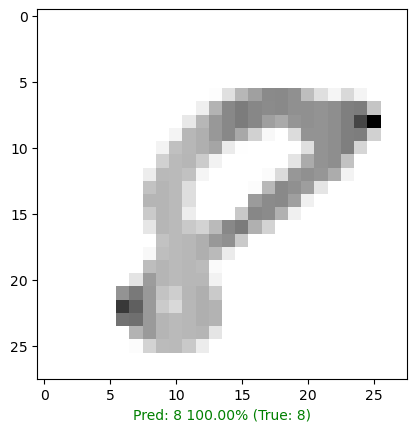

In [47]:
# Plotting it, using the function defined above:
plotting_random_image(model = model_3, 
                      images = test_images_norm, 
                      true_labels = test_labels, 
                      classes = class_names)

In [48]:
import random
import matplotlib.pyplot as plt
import numpy as np

def plotting_multiple_random_images(model, images, true_labels, classes, fontsize=12):
    # Setting random indices for four images:
    indices = random.sample(range(len(images)), 4)

    # Create a subplot with four axes for images and graphs:
    fig, axes = plt.subplots(2, 4, figsize=(11, 5.8))
    axes = axes.flatten()  # Flatten the 2D axes array to 1D for easier indexing

    predictions = []  # Initialize an empty list for storing predictions

    for i, ax in enumerate(axes):
        if i % 2 == 0:
            # Display the image
            image_index = indices[i // 2]
            target_image = images[image_index]
            true_label = classes[true_labels[image_index]]

            # Predict the label for the image:
            pred_probs = model.predict(target_image.reshape(1, 28, 28))
            pred_label = classes[pred_probs.argmax()]
            pred_prob = np.max(pred_probs)

            # Add the prediction to the list
            predictions.append((pred_label, pred_prob))

            # Plot the image:
            ax.imshow(target_image, cmap=plt.cm.binary)
            ax.set_xticks([])
            ax.set_yticks([])

            # Change the color of the titles depending on whether the prediction is right/wrong
            if pred_label == true_label:
                color = 'green'
            else:
                color = 'red'

            # Add xlabel:
            ax.set_xlabel('Pred: {} {:.2f}% (True: {})'.format(pred_label,
                                                                100 * pred_prob,
                                                                true_label),
                          color=color)
        else:
            # Display the bar graph
            graph_index = (i - 1) // 2
            pred_label, pred_prob = predictions[graph_index]

            # Determine the color for the bar based on prediction correctness and class name frequency:
            color = 'gray'  # Default color
            if pred_label == true_label:
                color = 'blue'  # Correctly predicted
            elif pred_prob < 0.5:
                color = 'red'  # Wrongly predicted

            # Create the bar graph:
            ax.bar([0, 1], [pred_prob, 1 - pred_prob], color=color)
            ax.set_xticks([0, 1])
            ax.set_xticklabels(['Predicted', 'Others'])
            ax.set_ylim([0, 1])
            ax.set_ylabel('Probability')
            ax.set_title('Prediction Bar Graph')

    plt.tight_layout()
    plt.show()


1/1 [==============================] - 0s 19ms/step


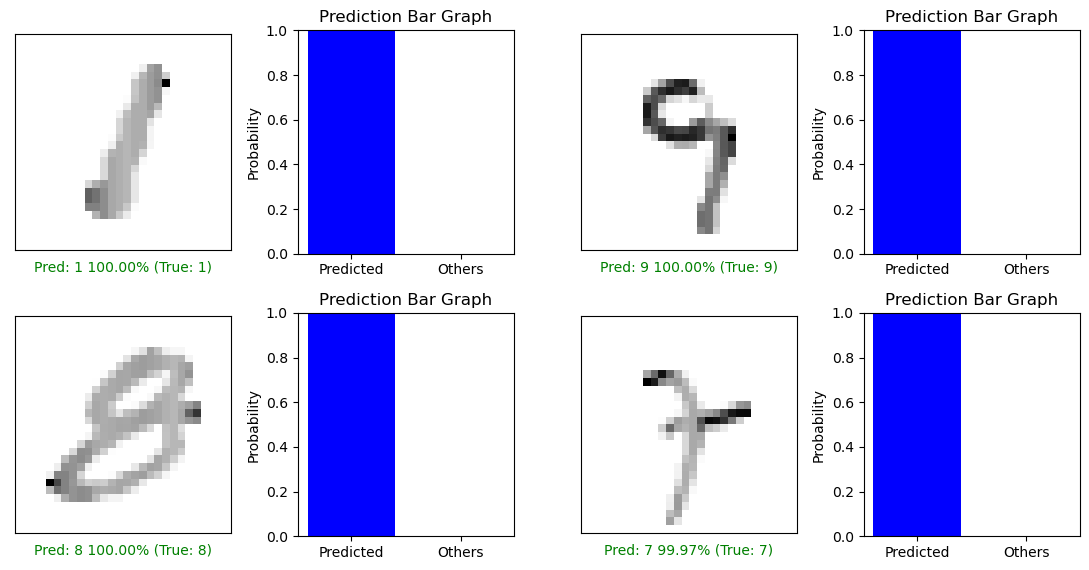

In [49]:
plotting_multiple_random_images(model = model_3, 
                                images = test_images_norm, 
                                true_labels = test_labels, 
                                classes = class_names)

In [50]:
def plot_class_images(model, images, labels, classes, class_label, num_images=3):
    # Filter images and labels based on the specified class label
    class_indices = np.where(labels == class_label)[0]
    selected_indices = np.random.choice(class_indices, size=num_images, replace=False)
    selected_images = images[selected_indices]
    selected_labels = labels[selected_indices]

    # Make predictions on the selected images
    predictions = model.predict(selected_images)

    # Plot the images and predictions
    fig, axes = plt.subplots(1, num_images, figsize=(10, 3))

    for i in range(num_images):
        ax = axes[i]
        ax.imshow(selected_images[i], cmap=plt.cm.binary)
        ax.set_xticks([])
        ax.set_yticks([])

        pred_label = np.argmax(predictions[i])
        true_label = selected_labels[i]
        pred_prob = np.max(predictions[i])

        if pred_label == true_label:
            color = 'green'
        else:
            color = 'red'

        ax.set_xlabel('Pred: {} {:.2f}% (True: {})'.format(classes[pred_label], pred_prob * 100, classes[true_label]), color=color)
        ax.set_title('True Label: ' + classes[true_label], fontsize=10, color='black', y=-0.2)  # Add 'True Label' text

    plt.tight_layout()
    plt.show()


In [51]:
class_names[7]

'7'

1/1 [==============================] - 0s 29ms/step


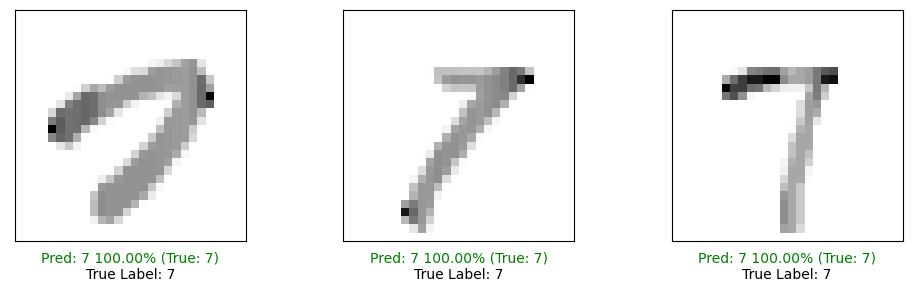

In [57]:
plot_class_images(model = model_3, 
                  images = test_images_norm, 
                  labels = test_labels, 
                  classes = class_names, 
                  class_label = class_names.index('7'), 
                  num_images = 3)


In [53]:
model_3.layers

In [54]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [33]:
# !pip install pydot
# !pip install graphviz

In [55]:
# Plotting the model VISUALLY:
from tensorflow.keras.utils import plot_model

# Showing the inputs and outputs of each layer:
plot_model(model_3, 
           show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [56]:
tensorboard --logdir=./logs


Reusing TensorBoard on port 6006 (pid 13172), started 1 day, 21:15:05 ago. (Use '!kill 13172' to kill it.)